![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# $\textbf{ Least square Regression Modeling Using EEG Data} $

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
##**Least square Modeling in Python**

### **Syntax**
### `numpy.linalg.lstsq(X,rts,rcond)`

* Return the least-squares solution to a linear matrix equation.

<details>
<summary><b>Explanation of parameters</b></summary>

**Parameters:**

**`a(M, N)`** array_like, “Coefficient” matrix.

**`b{(M,), (M, K)}`** array_like, Ordinate or “dependent variable” values. If b is two-dimensional, the least-squares solution is calculated for each of the K columns of b.

**`rcond`** float, optional
Cut-off ratio for small singular values of a. For the purposes of rank determination, singular values are treated as zero if they are smaller than rcond times the largest singular value of a.

**Returns:**

**`x{(N,), (N, K)}`** ndarray
Least-squares solution. If b is two-dimensional, the solutions are in the K columns of x.

**`residuals{(1,), (K,), (0,)}`** ndarray
Sums of squared residuals: Squared Euclidean 2-norm for each column in b - a @ x. If the rank of a is < N or M <= N, this is an empty array. If b is 1-dimensional, this is a (1,) shape array. Otherwise the shape is (K,).

**`rank`** int, Rank of matrix a.

**`s(min(M, N),)`**  ndarray, Singular values of a.
</details>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

###Mount your google drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Create a variable for the file path onto your google drive and load the data

In [ ]:
EEG_RT_data_path = "/content/gdrive/MyDrive/EEG_RT_data.mat"

# load the data

data = sio.loadmat(EEG_RT_data_path)
#print(data.keys()) # print out the variables (predictors) for the data

###Extract data for each variables

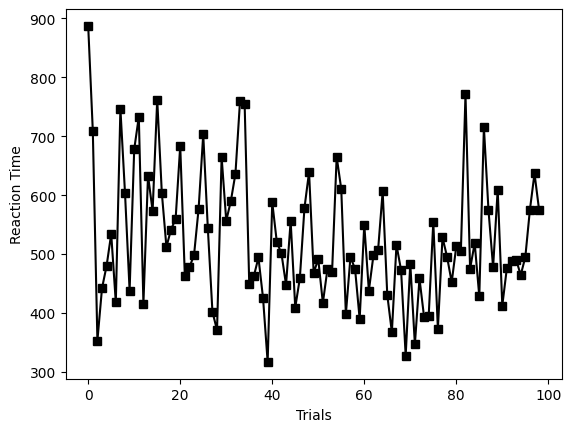

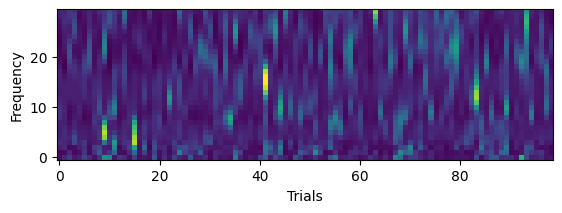

In [ ]:
# the data for each variable is stored in 2D list [[data]]
rts = data['rts'] # rts : reaction time for each trial
rts = rts[0] # extract the value and save the data in a 1D list

EEGdata = data["EEGdata"] # EEG data : energy from voltages changes in the brain pulse
frex = data["frex"] # frex : frequeines corresponding of energy in each trial
frex = frex[0] # extract the value from 2D list and save it as a 1D list

nTrials = len(rts)
nFrex = len(frex)

# show the data
plt.plot(rts, "ks-")
plt.xlabel("Trials")
plt.ylabel("Reaction Time")

plt.show()

plt.imshow(EEGdata, origin = "lower")
plt.xlabel("Trials")
plt.ylabel("Frequency")

plt.show()

###**Least Square Regression:** Is there a relation between EEG energy (frequency) and the reaction time (rts)?
####**Syntax**
`numpy.linalg.lstsq(X, rts, rcond)`
* return the least-square solution to a linear matrix equation

In [ ]:
# design matrix has three terms for three parameters
# vector of the first is for intercept, vector of reaction times, vector for EEG data

X = np.concatenate(
                    [
                        np.ones([nTrials - 1, 1]), # intercept
                        np.reshape(rts[0: -1], (nTrials - 1, 1)),# rts (previous) ends on the n - 1 trials
                        np.reshape(EEGdata[10, : -1], (nTrials - 1, 1)) # brain energy at 10 Hz (current) starting from the second trial and ends on the last trial
                    ],
                  axis = 1)

print(f"The size of the design matrix X {X.shape}")

# beta = (X.T @ X)^(-1) @ X.T @ y here the y rts, (X.TX) * beta = X.Ty
b1 = np.linalg.solve(X.T @ X, X.T @ rts[1: ])
# second method is to use the library
b2 = np.linalg.lstsq(X, rts[1 : ], rcond = None)[0]
print(f"parameters ")
print(b1)
print(b2)

The size of the design matrix X (98, 3)
parameters 
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


###**Drop the previous rts from the model because the reaction time of the previous does not effect too much of the reaction time of the current trial. The influence is small enough to be ignored**

The size of the design matrix X (99, 2)
[ -1.58036212   1.45278377  22.64492064  32.27655767  21.56721422
  18.12570874  22.23581072  31.82180982  36.48443107  31.83136225
  25.4814663   17.34930448   9.22160399   4.07223196   1.72863185
   0.61020774  -0.70284708  -3.35199293  -7.95283058 -13.7972634
 -20.52683477 -27.11716726 -31.99941131 -34.12508339 -31.65202437
 -25.69663959 -19.056376   -12.44376708  -8.01855578  -7.71753689]


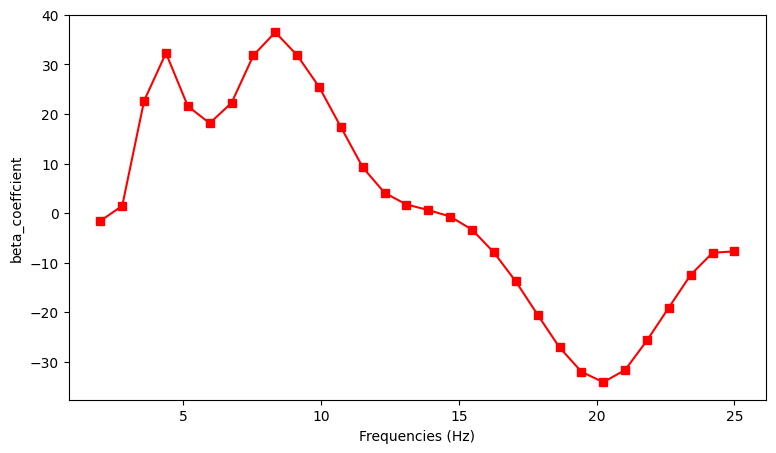

In [ ]:
# design matrix has three terms for three parameters
# vector of the first is for intercept, vector of reaction times, vector for EEG data

b = np.zeros(len(frex))

# loop through all frequencies
for fi in np.arange(0, len(frex)) :
  # create the design matrix for this frequency with rts
  X = np.concatenate(
                      [
                          np.ones([nTrials, 1]), # intercept
                          np.reshape(EEGdata[fi, : ], (nTrials, 1)) # brain energy at 10 Hz (current) starting from the
                          # second trial and ends on the last trial
                      ],
                    axis = 1)
  # save the parameter for each frequency
  b[fi] = np.linalg.lstsq(X, rts, rcond = None)[0][1] # [0] is the intercept [1] is the slope

print(f"The size of the design matrix X {X.shape}")

# beta = (X.T @ X)^(-1) @ X.T @ y here the y rts, (X.TX) * beta = X.Ty
# b1 = np.linalg.solve(X.T @ X, X.T @ rts)
# second method is to use the library


# print(f"parameters ")
print(b)
# print(b2)

plt.figure(figsize = (9, 5))
plt.plot(frex, b, "rs-")
plt.xlabel("Frequencies (Hz)")
plt.ylabel("beta_coeffcient")

plt.show()

####**Summary**
* When $\beta = 0$, there is no relation between reaction time and the brain energy
* We saw that $\beta$ has a maximum positive value at frequency around 8.5 Hz, meaning that the time is longest, show reaction.
* We saw that $\beta$ has a maximum negative value at 20 Hs, meaning the reaction time is shortest, faster reaction.

####**Plot the distributions of reaction time at 8.5 and 20 Hz**

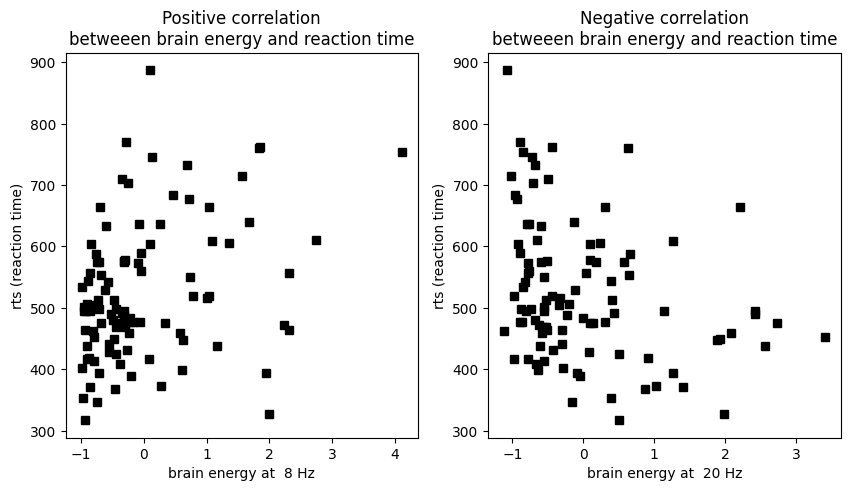

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(EEGdata[8, :], rts, "ks")
plt.ylabel("rts (reaction time)")
plt.xlabel(f"brain energy at {frex[8] : .0f} Hz")

plt.title("Positive correlation\nbetweeen brain energy and reaction time")

plt.subplot(122)
plt.plot(EEGdata[23, :], rts, "ks")
plt.ylabel("rts (reaction time)")
plt.xlabel(f"brain energy at {frex[23] : .0f} Hz")

plt.title("Negative correlation\nbetweeen brain energy and reaction time")

plt.show()